# Pembuatan Testcase

In [ ]:
valList = []
wtList = []

In [ ]:
import random
s = ""
N = random.randint(10, 1000)
s = str(N) + "\n"
for i in range (N):
  val = random.randint(1,10)
  valList.append(val)
  s += str(val) + " "
s += "\n"
for i in range (N):
  wt = random.randint(1,100)
  wtList.append(wt)
  s += str(wt) + " "
s += "\n"
Q = random.randint(10,10)
s += str(Q)+ "\n"
for i in range(Q):
  kp = random.randint(100,100000)
  s += str(kp) + "\n"
print(s)


63
4 10 1 10 8 7 3 8 6 8 2 7 8 5 8 9 8 5 6 10 9 3 9 8 5 10 10 5 3 6 5 5 1 6 3 1 9 4 3 5 8 10 5 3 3 7 8 10 8 3 10 2 5 4 7 3 10 3 1 9 3 3 7 
65 40 9 98 95 23 20 6 65 26 40 81 80 71 40 30 97 27 58 42 26 11 15 19 99 56 6 6 16 14 89 68 39 99 77 67 92 79 18 97 25 50 68 68 39 30 98 63 68 8 82 63 24 46 58 42 94 68 29 68 25 56 40 
10
93917
93705
71862
44090
58794
80460
83210
74913
37933
22775



# Analisis Hasil

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
out_df = pd.read_csv("/content/combined_csv.csv")

In [19]:
n_sorted_out_df = out_df.copy().sort_values(by='N')
nkp_sorted_out_df = out_df.copy().sort_values(by='N*Kp')

In [20]:
display(out_df)

DPOut    DPTime   GAOut     GATime  ...  TimeDiffTotal    N    Kp     N*Kp
0     1481  48349800  1071.0  182562600  ...     -629956500  763  4177  3187051
1     1079  15333600   787.0  118761600  ...     -413941700  763  2303  1757189
2     1024  16415100   739.0  104883200  ...     -387682900  763  2082  1588566
3     1044  15245600   753.0  100160000  ...     -394325300  763  2162  1649606
4     1244  10108000   915.0   96364300  ...     -400586800  763  2996  2285948
..     ...       ...     ...        ...  ...            ...  ...   ...      ...
995   1638  18540100  1488.0    8865100  ...     -112833100  390  9538  3719820
996   1630  21177300  1494.0    9689800  ...     -108275900  390  9437  3680430
997    399   1385300   336.0   21909100  ...     -102230000  390   621   242190
998   1037   8885600   885.0   16048300  ...     -108425100  390  3889  1516710
999   1130  10738500   975.0   15466600  ...     -110486000  390  4579  1785810

[1000 rows x 12 columns]

In [21]:
#describe
out_df.describe()

DPOut        DPTime  ...           Kp          N*Kp
count  1000.000000  1.000000e+03  ...  1000.000000  1.000000e+03
mean   1229.585000  1.829373e+07  ...  4996.185000  2.553064e+06
std     638.343092  1.478684e+07  ...  2866.041629  2.171133e+06
min      35.000000  1.742000e+05  ...   122.000000  2.156000e+03
25%     702.750000  5.983350e+06  ...  2401.500000  7.222465e+05
50%    1202.000000  1.526870e+07  ...  5053.000000  1.945204e+06
75%    1721.750000  2.703915e+07  ...  7534.500000  3.844737e+06
max    2692.000000  8.017080e+07  ...  9984.000000  9.131688e+06

[8 rows x 11 columns]

In [22]:
out_df['gap'] = abs(out_df['GAOut'] - out_df['DPOut'])
display(out_df)
print(out_df['gap'].mean())
print(out_df['gap'].median())

DPOut    DPTime   GAOut     GATime  ...    N    Kp     N*Kp    gap
0     1481  48349800  1071.0  182562600  ...  763  4177  3187051  410.0
1     1079  15333600   787.0  118761600  ...  763  2303  1757189  292.0
2     1024  16415100   739.0  104883200  ...  763  2082  1588566  285.0
3     1044  15245600   753.0  100160000  ...  763  2162  1649606  291.0
4     1244  10108000   915.0   96364300  ...  763  2996  2285948  329.0
..     ...       ...     ...        ...  ...  ...   ...      ...    ...
995   1638  18540100  1488.0    8865100  ...  390  9538  3719820  150.0
996   1630  21177300  1494.0    9689800  ...  390  9437  3680430  136.0
997    399   1385300   336.0   21909100  ...  390   621   242190   63.0
998   1037   8885600   885.0   16048300  ...  390  3889  1516710  152.0
999   1130  10738500   975.0   15466600  ...  390  4579  1785810  155.0

[1000 rows x 13 columns]

225.876
187.5


In [23]:
#Outliers pada Atribut-atribut Data
print("Outliers pada Atribut-atribut Data: \n")
q1 = out_df.quantile(0.25)
q3 = out_df.quantile(0.75)
iqr = q3 - q1
display(((out_df < (q1 - 1.5 * iqr)) | (out_df > (q3 + 1.5 * iqr))).sum())

Outliers pada Atribut-atribut Data: 



DPOut             0
DPTime           16
GAOut             0
GATime           20
GA Total Time     4
isSame           55
OutDiff           0
TimeDiffBest     28
TimeDiffTotal     3
N                 0
Kp                0
N*Kp             10
gap               0
dtype: int64

In [24]:
def create_hist(column):
    data = out_df[column]
    plt.figure(figsize=(7,5))
    sns.kdeplot(data, shade=True)
    plt.show()
def countplot(column):
    plt.figure(figsize=(15,13))
    plt.xticks(rotation=90)
    return sns.countplot(x= column, data=out_df)
def create_scatter(x,y, title, x_tit, y_tit):
    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.scatter(out_df[x], out_df[y])

    plt.xlabel(x_tit)
    plt.ylabel(y_tit)
    plt.show

isSame
False    945
True      55
dtype: int64


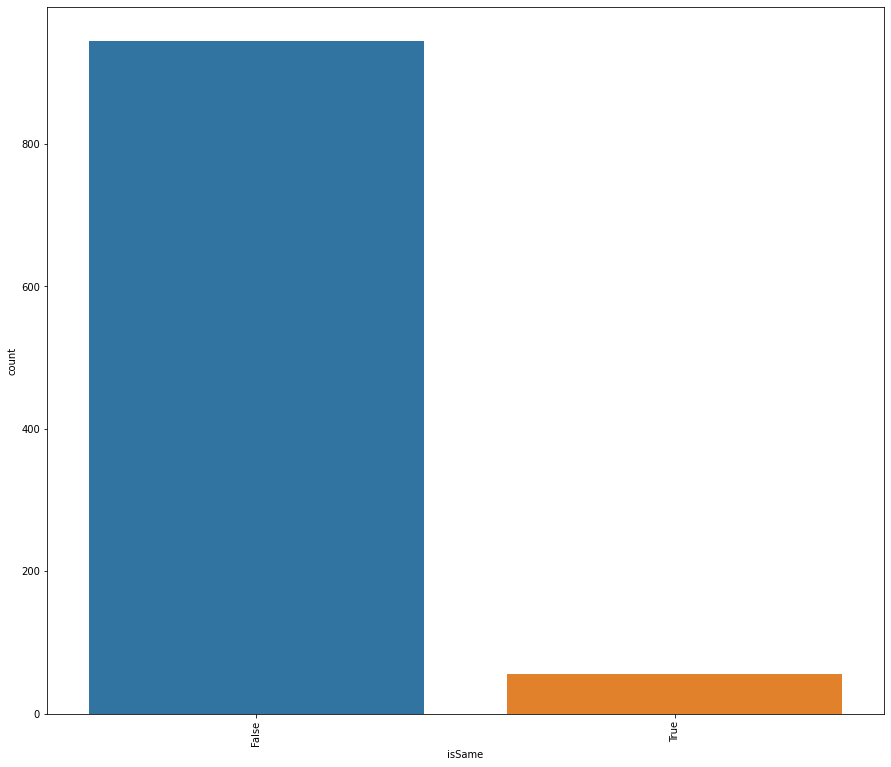

In [25]:
countplot("isSame")
print(out_df.groupby(['isSame']).size())

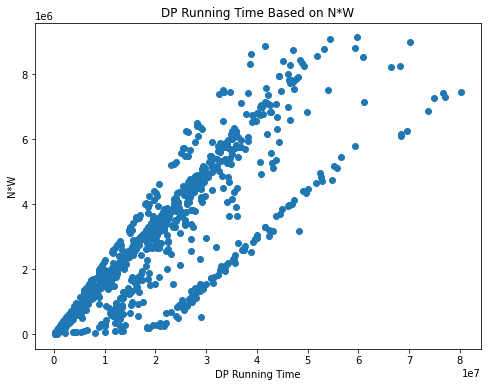

In [26]:
create_scatter("DPTime", "N*Kp", "DP Running Time Based on N*W", "DP Running Time", "N*W")

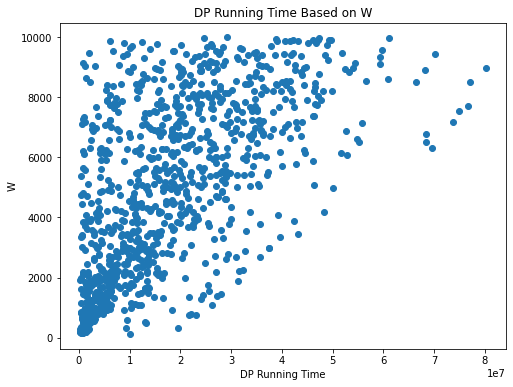

In [27]:
create_scatter("DPTime", "Kp", "DP Running Time Based on W", "DP Running Time", "W")

Kecepatan GA paling dipengaruhi oleh banyaknya N, tetapi untuk nilai N yg sama bisa mempunyai waktu yang berbeda juga.


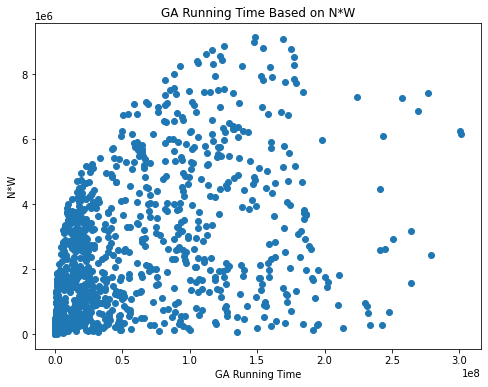

In [28]:
create_scatter("GATime", "N*Kp", "GA Running Time Based on N*W", "GA Running Time", "N*W")

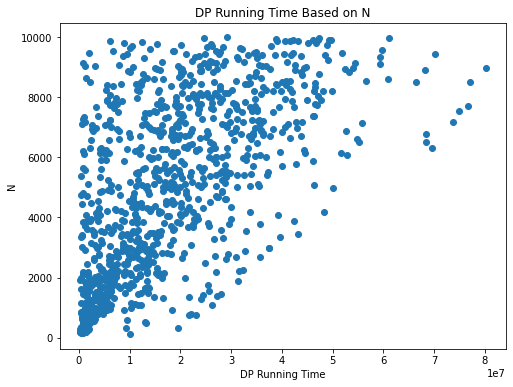

In [29]:
create_scatter("DPTime", "Kp", "DP Running Time Based on N", "DP Running Time", "N")

Nilai mendekati dan tidak ada outlier

In [30]:
plt.show()
create_scatter("DPOut", "GAOut", "DP vs GA Output Value Comparison", "DP Output Value", "GA Output Value")

In [31]:
dpTime = nkp_sorted_out_df["DPTime"]
gaTime = nkp_sorted_out_df["GATime"]
NKp = nkp_sorted_out_df["N*Kp"]

plt.figure(figsize=(20, 12))
plt.plot(NKp,dpTime)
plt.plot(NKp,gaTime)
plt.ylabel('Time')
plt.xlabel('N*W')
plt.legend(['DP', 'GA'], fontsize=12)
plt.title("DP vs GA Individual Time for 1000 Random Cases")
plt.show()

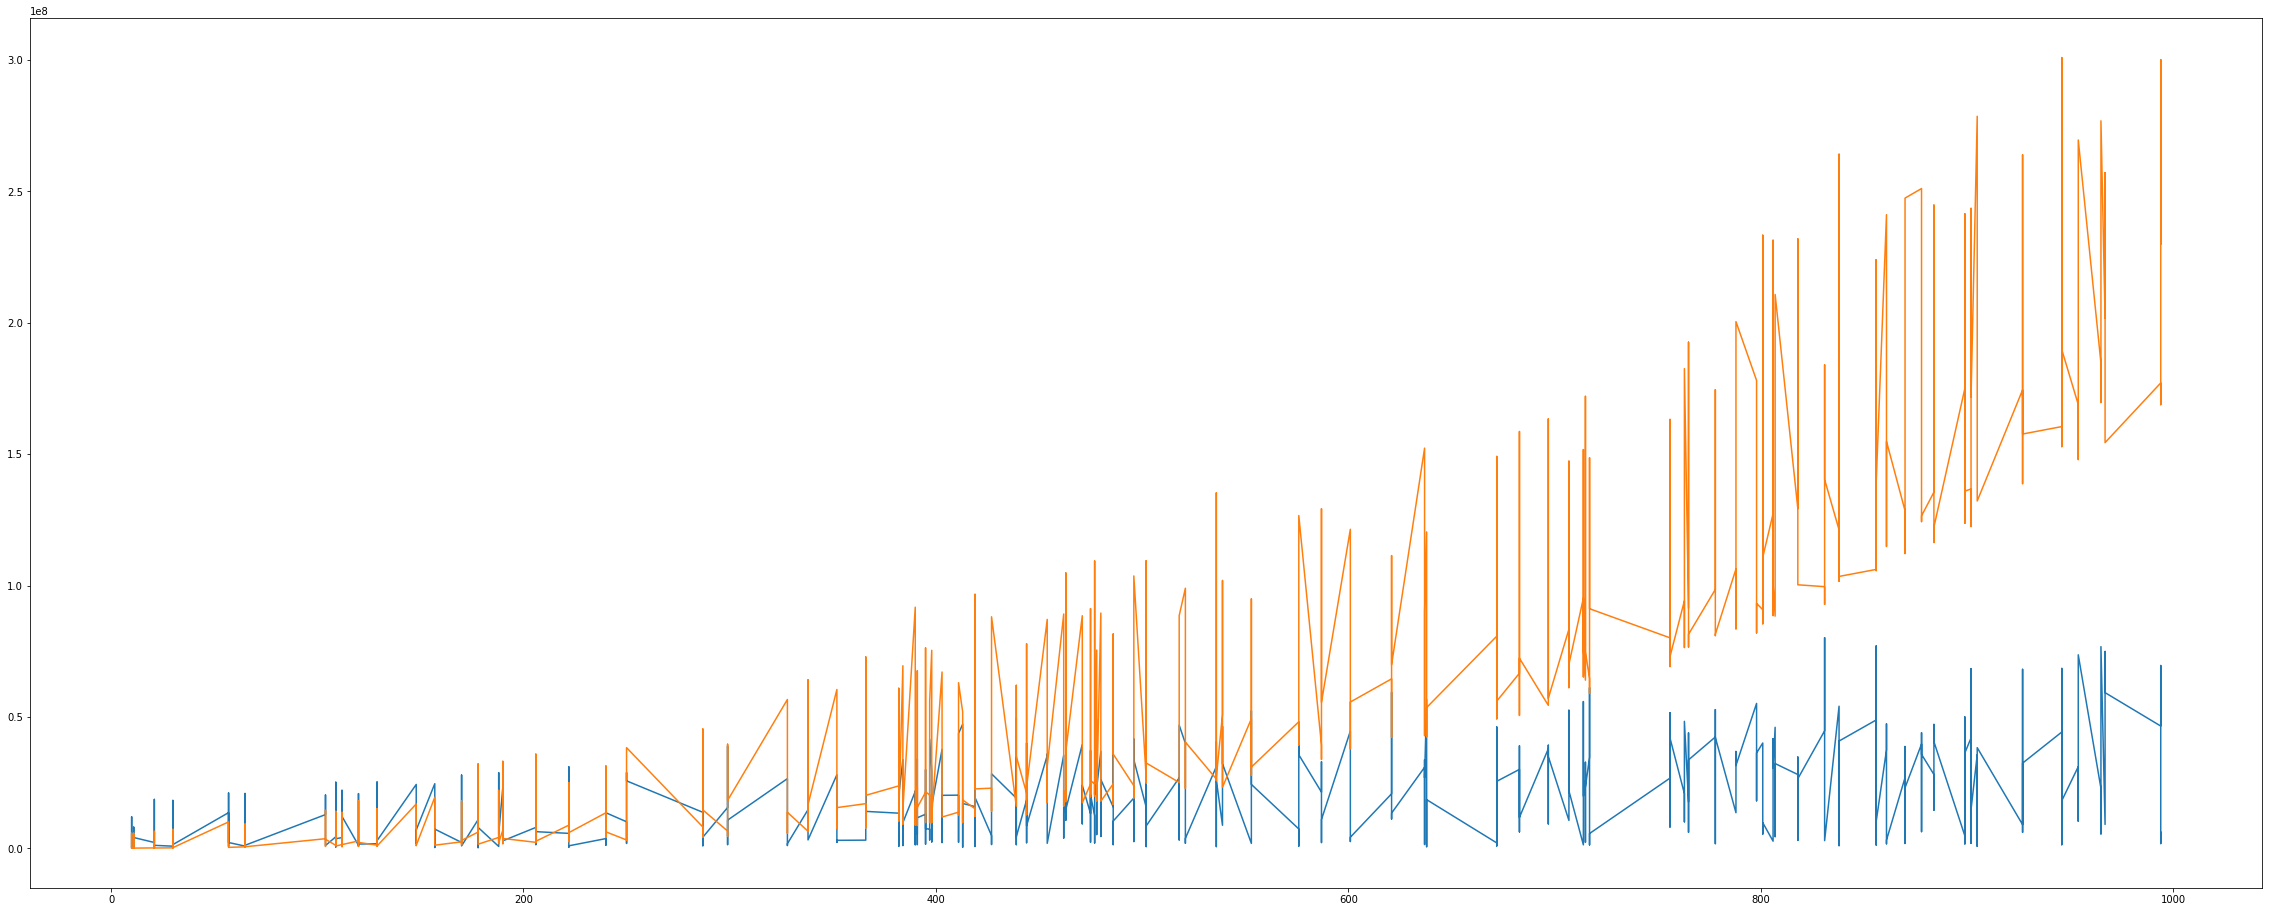

In [32]:
dpTime = n_sorted_out_df["DPTime"]
gaTime = n_sorted_out_df["GATime"]
N = n_sorted_out_df["N"]

plt.figure(figsize=(40,16))
plt.plot(N,dpTime)
plt.plot(N,gaTime)
plt.show()

In [33]:
dpCum = []
for i in range(len(dpTime)):
  if (i == 0):
    dpCum.append(dpTime[i])
  else:
    dpCum.append(dpTime[i] + dpCum[i-1])
print(dpCum)

gaCum = []
for i in range(len(gaTime)):
  if (i == 0):
    gaCum.append(gaTime[i])
  else:
    gaCum.append(gaTime[i] + gaCum[i-1])
print(gaCum)

N = n_sorted_out_df["N"]

[48349800, 63683400, 80098500, 95344100, 105452100, 117021800, 148033400, 174386600, 215394800, 236234400, 261412200, 267516000, 279545500, 282065200, 282606300, 289241600, 290377200, 294786600, 298441200, 300312800, 346518000, 347629900, 376744000, 403731400, 432071300, 432985800, 467979600, 483655100, 485737700, 511256100, 545013100, 546100900, 568295600, 594335800, 604361000, 617484200, 639160000, 645014100, 663235400, 673015300, 686612700, 699317200, 700526600, 703836200, 705318400, 710811100, 713373900, 715604000, 717888200, 719332900, 756812700, 804192700, 832310400, 834058900, 839159200, 872666000, 906152400, 945517200, 948662700, 959997600, 1014804200, 1075929600, 1108086200, 1139276500, 1173959400, 1175292700, 1180945700, 1223227400, 1263712400, 1299571500, 1335225300, 1368054300, 1406384200, 1442275500, 1448518900, 1461196000, 1474594700, 1481414300, 1517209400, 1517990900, 1542601400, 1551526600, 1566744100, 1583063600, 1588296100, 1590718100, 1591061500, 1594831500, 1601191

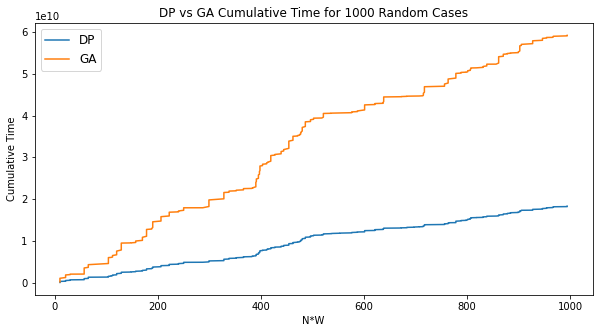

In [34]:
plt.figure(figsize=(10,5))
plt.plot(
  N,
  dpCum
)
plt.plot(
  N,
  gaCum
)
plt.ylabel('Cumulative Time')
plt.xlabel('N*W')
plt.legend(['DP', 'GA'], fontsize=12)
plt.title("DP vs GA Cumulative Time for 1000 Random Cases")
plt.show()